In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [3]:
cab_data = pd.read_csv("Cab_Data.csv")
customer = pd.read_csv("Customer_ID.csv")
transaction = pd.read_csv("Transaction_ID.csv")
city = pd.read_csv("City.csv")


In [5]:
# Check shape and columns
for df, name in zip([cab_data, customer, transaction, city], 
                    ["Cab_Data", "Customer_ID", "Transaction_ID", "City"]):
    print(f"\n{name} Info:")
    display(df.info())
    display(df.head())



Cab_Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


None

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776



Customer_ID Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


None

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536



Transaction_ID Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


None

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card



City Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


None

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [7]:
print("Duplicates before removal:")
print(cab_data.duplicated().sum(), customer.duplicated().sum(), transaction.duplicated().sum(), city.duplicated().sum())

# Remove if any
cab_data.drop_duplicates(inplace=True)
customer.drop_duplicates(inplace=True)
transaction.drop_duplicates(inplace=True)
city.drop_duplicates(inplace=True)

Duplicates before removal:
0 0 0 0


In [11]:
# Fixing Excel serial date format
master_data['Date of Travel'] = pd.to_datetime(master_data['Date of Travel'], origin='1899-12-30', unit='D')

In [13]:
print(master_data['Date of Travel'].head())


0   2016-01-08
1   2016-01-06
2   2016-01-02
3   2016-01-07
4   2016-01-03
Name: Date of Travel, dtype: datetime64[ns]


In [15]:
# Merge cab and transaction
cab_txn = pd.merge(cab_data, transaction, on='Transaction ID', how='inner')

In [17]:
# Merge with customer demographics
cab_txn_cust = pd.merge(cab_txn, customer, on='Customer ID', how='inner')

In [19]:
# Merge with city data
master_data = pd.merge(cab_txn_cust, city, on='City', how='left')

In [23]:
# Convert date column
master_data['Date of Travel'] = pd.to_datetime(master_data['Date of Travel'], origin='1899-12-30', unit='D')

In [25]:
# Profit and Margin
master_data['Profit'] = master_data['Price Charged'] - master_data['Cost of Trip']
master_data['Profit Margin (%)'] = (master_data['Profit'] / master_data['Cost of Trip']) * 100

In [27]:
# Date-based features
master_data['Year'] = master_data['Date of Travel'].dt.year
master_data['Month'] = master_data['Date of Travel'].dt.month
master_data['Weekday'] = master_data['Date of Travel'].dt.day_name()

In [29]:
print(master_data.describe(include='all'))

        Transaction ID                 Date of Travel     Company  \
count     3.593920e+05                         359392      359392   
unique             NaN                            NaN           2   
top                NaN                            NaN  Yellow Cab   
freq               NaN                            NaN      274681   
mean      1.022076e+07  2017-08-17 01:37:55.042293760         NaN   
min       1.000001e+07            2016-01-02 00:00:00         NaN   
25%       1.011081e+07            2016-11-23 00:00:00         NaN   
50%       1.022104e+07            2017-09-10 00:00:00         NaN   
75%       1.033094e+07            2018-05-12 00:00:00         NaN   
max       1.044011e+07            2018-12-31 00:00:00         NaN   
std       1.268058e+05                            NaN         NaN   

               City   KM Travelled  Price Charged   Cost of Trip  \
count        359392  359392.000000  359392.000000  359392.000000   
unique           19            NaN 

In [31]:
company_group = master_data.groupby('Company')
company_summary = company_group[['Price Charged', 'Cost of Trip', 'Profit']].sum()
company_summary['Profit Margin (%)'] = (company_summary['Profit'] / company_summary['Cost of Trip']) * 100
print(company_summary)

            Price Charged  Cost of Trip        Profit  Profit Margin (%)
Company                                                                 
Pink Cab     2.632825e+07  2.102092e+07  5.307328e+06          25.247837
Yellow Cab   1.258539e+08  8.183351e+07  4.402037e+07          53.792598


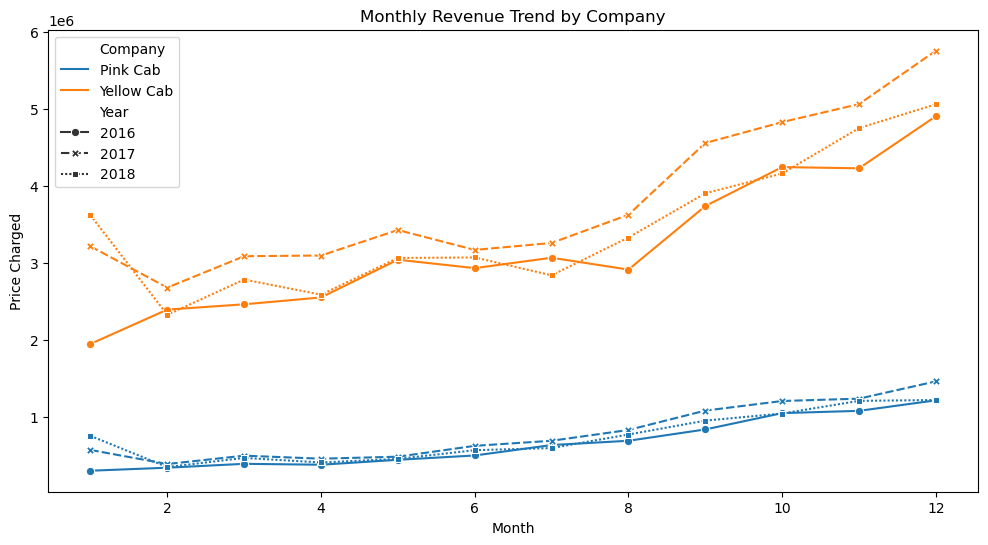

In [33]:
monthly_trend = master_data.groupby(['Year', 'Month', 'Company'])['Price Charged'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='Month', y='Price Charged', hue='Company', style='Year', markers=True)
plt.title("Monthly Revenue Trend by Company")
plt.show()

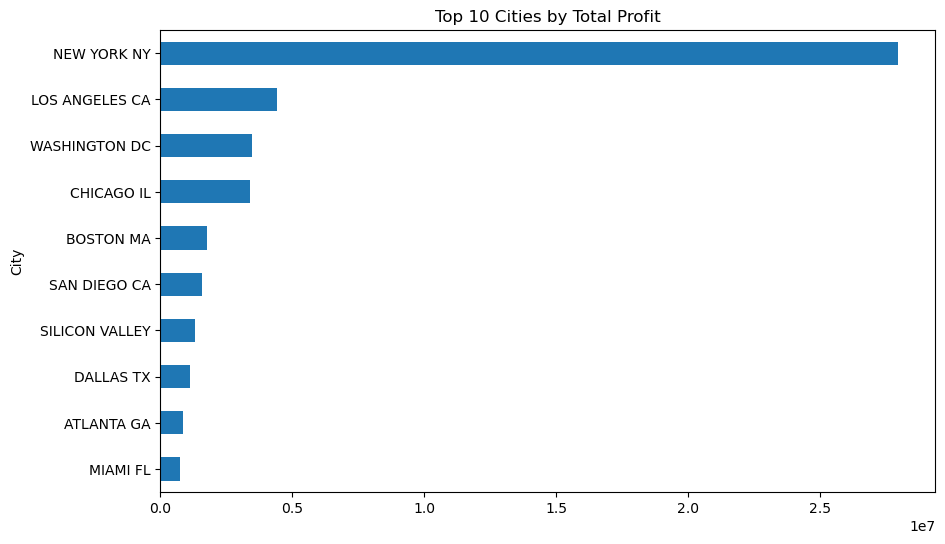

In [35]:
top_cities = master_data.groupby('City')['Profit'].sum().sort_values(ascending=False).head(10)
top_cities.plot(kind='barh', figsize=(10, 6), title='Top 10 Cities by Total Profit')
plt.gca().invert_yaxis()
plt.show()

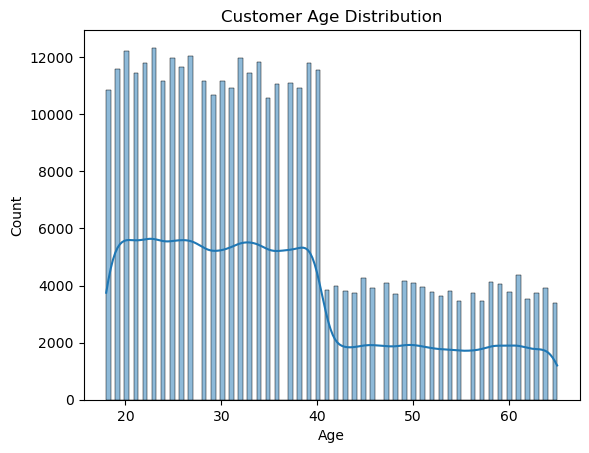

In [37]:
# Age Distribution
sns.histplot(master_data['Age'], kde=True)
plt.title("Customer Age Distribution")
plt.show()


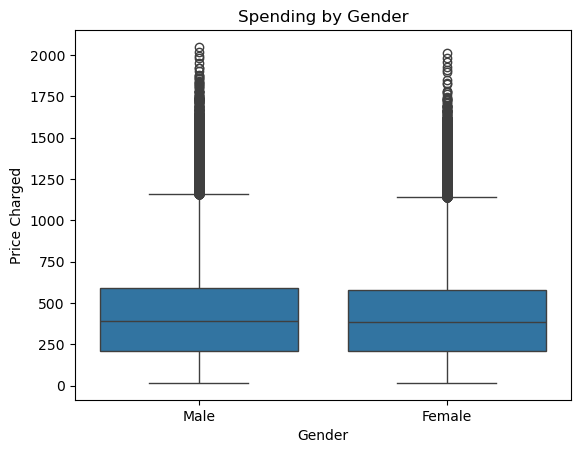

In [39]:
# Gender vs Spend
sns.boxplot(x='Gender', y='Price Charged', data=master_data)
plt.title("Spending by Gender")
plt.show()


In [41]:
# Calculate profit
master_data['Profit'] = master_data['Price Charged'] - master_data['Cost of Trip']

In [43]:
# Extract date features
master_data['Year'] = master_data['Date of Travel'].dt.year
master_data['Month'] = master_data['Date of Travel'].dt.month
master_data['DayOfWeek'] = master_data['Date of Travel'].dt.dayofweek
master_data['Week'] = master_data['Date of Travel'].dt.isocalendar().week

<Axes: xlabel='Company', ylabel='count'>

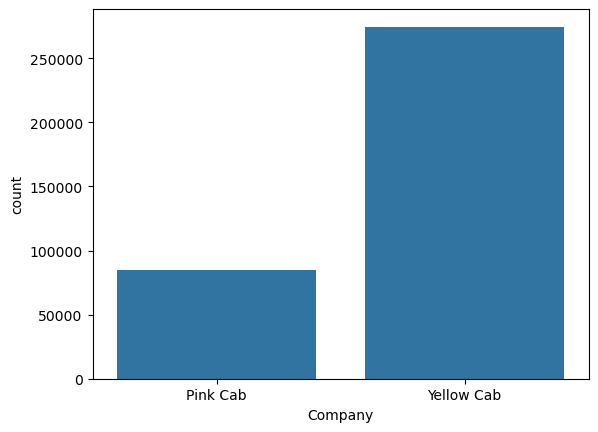

In [45]:
import seaborn as sns
sns.countplot(data=master_data, x='Company')

<Axes: xlabel='Date', ylabel='Price Charged'>

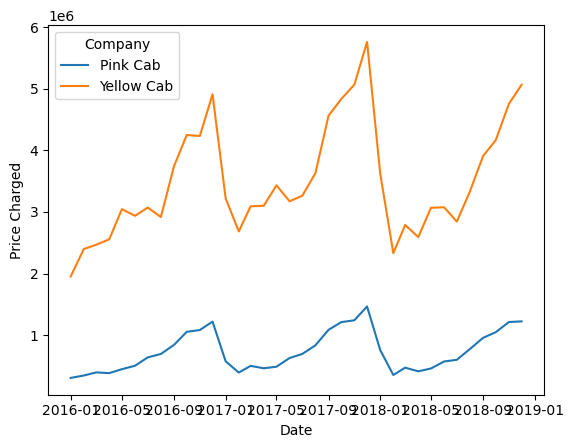

In [47]:
monthly_revenue = master_data.groupby(['Year', 'Month', 'Company'])['Price Charged'].sum().reset_index()
monthly_revenue['Date'] = pd.to_datetime(monthly_revenue[['Year', 'Month']].assign(DAY=1))

sns.lineplot(data=monthly_revenue, x='Date', y='Price Charged', hue='Company')

<Axes: xlabel='Company', ylabel='Profit'>

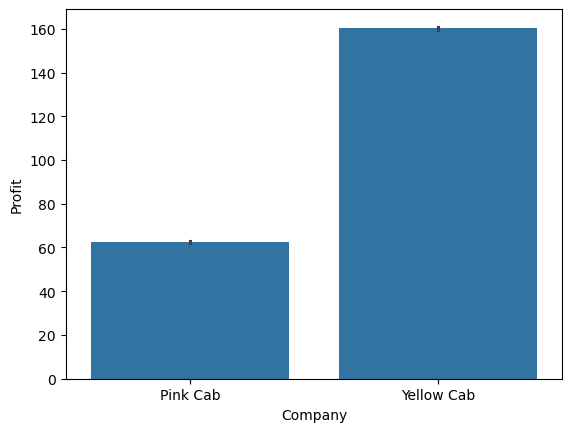

In [49]:
sns.barplot(data=master_data, x='Company', y='Profit')

In [57]:
print(master_data.columns)

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users', 'Profit',
       'Profit Margin (%)', 'Year', 'Month', 'Weekday', 'DayOfWeek', 'Week'],
      dtype='object')


In [59]:
# Remove leading/trailing spaces and unify casing
master_data.columns = master_data.columns.str.strip().str.title()


In [61]:
# Check column names again
print(master_data.columns)


Index(['Transaction Id', 'Date Of Travel', 'Company', 'City', 'Km Travelled',
       'Price Charged', 'Cost Of Trip', 'Customer Id', 'Payment_Mode',
       'Gender', 'Age', 'Income (Usd/Month)', 'Population', 'Users', 'Profit',
       'Profit Margin (%)', 'Year', 'Month', 'Weekday', 'Dayofweek', 'Week'],
      dtype='object')


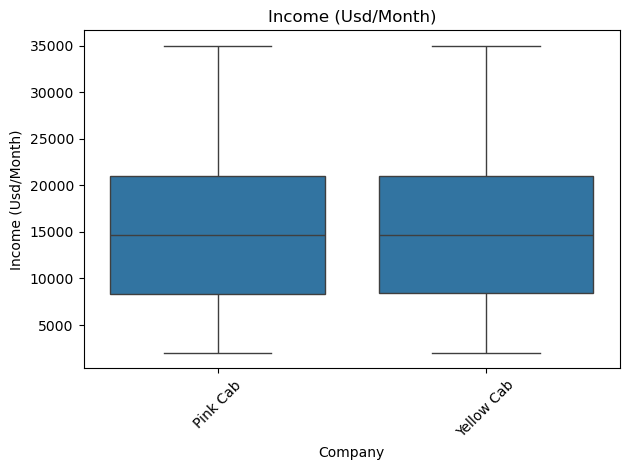

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=master_data, x='Company', y='Income (Usd/Month)')
plt.title("Income (Usd/Month)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [67]:
# Show a few rows
print(master_data.head())


   Transaction Id Date Of Travel   Company        City  Km Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost Of Trip  Customer Id Payment_Mode Gender  ...  \
0         370.95       313.635        29290         Card   Male  ...   
1         358.52       334.854        27703         Card   Male  ...   
2         125.20        97.632        28712         Cash   Male  ...   
3         377.40       351.602        28020         Cash   Male  ...   
4         114.62        97.776        27182         Card   Male  ...   

   Income (Usd/Month)  Population     Users  Profit  Profit Margin (%)  Year  \
0               10813    814,885    24,701   57.315   

In [69]:
from scipy.stats import ttest_ind

a_profit = master_data[master_data['Company'] == 'Pink Cab']['Profit']
b_profit = master_data[master_data['Company'] == 'Yellow Cab']['Profit']

t_stat, p_val = ttest_ind(a_profit, b_profit, equal_var=False)
print("T-test result:", t_stat, "P-value:", p_val)

T-test result: -230.99551452746311 P-value: 0.0
